<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/02_pytorch_classification.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=30691)

# 02. PyTorch 神经网络分类

## 什么是分类问题？

[分类问题](https://en.wikipedia.org/wiki/Statistical_classification)涉及预测某个事物是属于一个类别还是另一个类别。

例如，你可能想要：

| 问题类型      | 描述             | 示例                             |
| --------- | -------------- | ------------------------------ |
| **二分类问题** | 目标只有两个选项，例如是或否 | 根据健康参数预测某人是否患有心脏病。             |
| **多分类问题** | 目标可以是两个以上的选项   | 判断一张照片是食物、人物还是狗。               |
| **多标签分类** | 目标可以分配多个选项     | 预测一个维基百科条目应分配哪些类别（例如数学、科学和哲学）。 |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="不同的机器学习分类问题，例如二分类、多分类和多标签分类" width=900/>
</div>

分类问题与回归问题（预测一个数字，在[笔记本 01](https://www.learnpytorch.io/01_pytorch_workflow/)中讲解）一起，是最常见的机器学习问题类型之一。

在本笔记本中，我们将通过几个不同的分类问题来学习 PyTorch。

换句话说，我们将通过一组输入预测这些输入属于哪个类别。


## 我们将要覆盖的内容

在本笔记本中，我们将重新回顾在[01. PyTorch 工作流](https://www.learnpytorch.io/02_pytorch_classification/)中覆盖的 PyTorch 工作流。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="PyTorch 工作流流程图" width=900/>

不同之处在于，我们不再尝试预测一条直线（预测一个数字，也叫回归问题），而是将处理一个 **分类问题**。

具体来说，我们将覆盖以下内容：

| **主题**                 | **内容**                                                                |
| ---------------------- | --------------------------------------------------------------------- |
| **0. 分类神经网络架构**        | 神经网络可以有几乎任何形状或大小，但它们通常遵循类似的架构。                                        |
| **1. 准备二分类数据**         | 数据可以是几乎任何形式，但为了入门，我们将创建一个简单的二分类数据集。                                   |
| **2. 构建 PyTorch 分类模型** | 在这里，我们将创建一个模型来学习数据中的模式，我们还将选择一个 **损失函数**，**优化器**，并构建一个针对分类的 **训练循环**。 |
| **3. 拟合模型到数据（训练）**     | 我们有了数据和模型，现在让我们让模型（尝试）在（**训练**）数据中找到模式。                               |
| **4. 做出预测并评估模型（推理）**   | 我们的模型在数据中找到了模式，让我们将其发现与实际（**测试**）数据进行比较。                              |
| **5. 改进模型（从模型的角度）**    | 我们已经训练并评估了模型，但它没有按预期工作，让我们尝试一些方法来改进它。                                 |
| **6. 非线性**             | 到目前为止，我们的模型只具有建模直线的能力，那非线性（非直线）怎么办？                                   |
| **7. 复制非线性函数**         | 我们使用 **非线性函数** 来帮助建模非线性数据，但这些函数长什么样？                                  |
| **8. 将所有内容结合起来进行多分类**  | 让我们将目前为止做的二分类所有内容与多分类问题结合起来。                                          |


## 哪里可以获得帮助？

本课程的所有材料都可以在 [GitHub 上找到](https://github.com/mrdbourke/pytorch-deep-learning)。

如果遇到问题，你也可以在 [讨论页面](https://github.com/mrdbourke/pytorch-deep-learning/discussions)上提问。

另外，还有 [PyTorch 开发者论坛](https://discuss.pytorch.org/)，这是一个关于 PyTorch 的非常有帮助的地方。

## 0. 分类神经网络的架构

在开始编写代码之前，让我们先看看分类神经网络的一般架构。

| **超参数**                    | **二分类**                                                                                                                                                                                                                  | **多分类**                                                                                                                                                   |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **输入层形状** (`in_features`)  | 与特征数相同（例如，预测心脏病时的年龄、性别、身高、体重、吸烟状态等5个特征）                                                                                                                                                                                  | 与二分类相同                                                                                                                                                    |
| **隐藏层(s)**                 | 问题特定，最少 = 1，最多 = 无限                                                                                                                                                                                                      | 与二分类相同                                                                                                                                                    |
| **每个隐藏层的神经元数量**            | 问题特定，通常为 10 到 512                                                                                                                                                                                                        | 与二分类相同                                                                                                                                                    |
| **输出层形状** (`out_features`) | 1（一个类别或另一个类别）                                                                                                                                                                                                            | 每个类别一个（例如，食物、人物或狗的照片，3个类别）                                                                                                                                |
| **隐藏层激活函数**                | 通常是 [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)（修正线性单元），但[可以有很多其他选择](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions)                             | 与二分类相同                                                                                                                                                    |
| **输出激活函数**                 | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)                                                                   | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **损失函数**                   | [二元交叉熵](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch)              | 交叉熵 ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch)                                  |
| **优化器**                    | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)（随机梯度下降）、[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)（更多选项见 [`torch.optim`](https://pytorch.org/docs/stable/optim.html)） | 与二分类相同                                                                                                                                                    |

当然，分类神经网络的组件清单会根据你正在处理的问题有所不同。

但这已经足够帮助你入门了。

在本笔记本中，我们将会深入实践这种架构。


## 1. 创建分类数据并准备好

让我们从生成一些数据开始。

我们将使用 Scikit-Learn 中的 [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) 方法来生成两个不同颜色的圆圈。


In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
          noise=0.03, # a little bit of noise to the dots
          random_state=42) # keep random state so we get the same values

好的，现在让我们查看前 5 个 `X` 和 `y` 值。


In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


看起来每一个 `y` 值对应两个 `X` 值。

让我们继续遵循数据探索者的座右铭：*可视化，可视化，再可视化*，将数据放入一个 pandas DataFrame 中。


In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


每个类别的样本数量如下：

* 类别 0: 50 个样本
* 类别 1: 50 个样本

这表明我们的数据集是平衡的，每个类别都有相同数量的样本。


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


500 每个，平衡得很好。

让我们绘制它们。


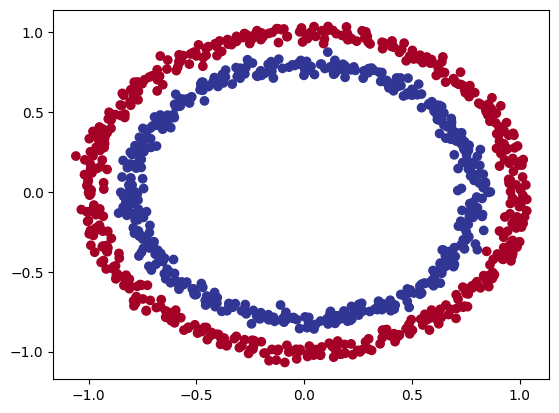

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

好了，看起来我们有一个问题需要解决。

让我们了解一下如何构建一个 PyTorch 神经网络来将数据点分类为红色（0）或蓝色（1）。

> **注意：** 这个数据集通常被视为一个 **玩具问题**（即用于尝试和测试的简单问题）在机器学习中。
>
> 但是它代表了分类的关键所在：你有一些数据以数字形式表示，并且你希望构建一个能够对其进行分类的模型，在我们的案例中，就是将数据点分为红色或蓝色。


### 1.1 输入和输出的形状

在深度学习中，最常见的错误之一是形状错误。

张量和张量操作的形状不匹配会导致模型出错。

在本课程中，我们将多次看到这类错误。

而且没有万无一失的方法可以保证它们不会发生，它们一定会发生。

你所能做的就是不断熟悉你正在处理的数据的形状。

我喜欢称之为输入和输出的形状。

问问自己：

“我的输入是什么形状，我的输出又是什么形状？”

让我们来了解一下。

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

看起来两者各自的第一个维度是匹配的。

有1000个`X`和1000个`y`。

但`X`的第二个维度是什么？

查看单个样本（特征和标签）的值与维度形状，通常会很有帮助。

这样做能帮助你理解，你期望从模型中得到的输入维度形状和输出维度形状分别是什么。

In [7]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


这告诉我们，`X` 的第二维意味着它有两个特征（向量），而 `y` 只有一个特征（标量）。

我们有两个输入对应一个输出。


### 1.2 将数据转化为张量并创建训练集和测试集

我们已经研究了数据的输入和输出形状，现在让我们为将其用于 PyTorch 和建模做好准备。

具体来说，我们需要：

1. 将数据转化为张量（目前我们的数据是 NumPy 数组，PyTorch 更倾向于使用 PyTorch 张量进行处理）。
2. 将数据分割为训练集和测试集（我们将在训练集上训练模型，学习 `X` 和 `y` 之间的模式，然后在测试集上评估这些学习到的模式）。


In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

现在我们的数据已经是张量格式，让我们将其分割为训练集和测试集。

为此，我们可以使用 Scikit-Learn 提供的有用函数 [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)。

我们将使用 `test_size=0.2`（80% 用于训练，20% 用于测试），由于数据的分割是随机进行的，因此我们设置 `random_state=42`，确保分割结果是可重现的。


In [9]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
              y,
              test_size=0.2, # 20% test, 80% train
              random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

太好了！看起来我们现在有 800 个训练样本和 200 个测试样本。


## 2. 构建模型

我们已经准备好了数据，现在是时候构建模型了。

我们将把它分为几个部分。

1. 设置设备无关的代码（这样我们的模型可以在 CPU 或 GPU 上运行，如果 GPU 可用的话）。
2. 通过子类化 `nn.Module` 构建模型。
3. 定义损失函数和优化器。
4. 创建训练循环（这一部分将在下一个章节中完成）。

好消息是，我们在笔记本 01 中已经完成了上述所有步骤。

不过这次我们将对它们进行调整，以便它们能够与分类数据集一起工作。

首先，让我们导入 PyTorch 和 `torch.nn`，并设置设备无关的代码。


In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

太棒了，现在 `device` 已经设置好了，我们可以在创建任何数据或模型时使用它，PyTorch 会自动处理在 CPU（默认）或 GPU 上的计算，如果 GPU 可用的话。

接下来，我们来创建一个模型吧！

我们需要一个能够处理 `X` 数据作为输入，并生成与 `y` 数据形状相同的输出的模型。

换句话说，给定 `X`（特征），我们希望模型能够预测 `y`（标签）。

这种包含特征和标签的设置被称为 **监督学习**。因为你的数据会告诉模型在给定特定输入时输出应该是什么。

为了创建这样一个模型，我们需要处理 `X` 和 `y` 的输入和输出形状。

记得我说过输入和输出形状很重要吗？现在我们就来看看原因。

让我们创建一个模型类，它会：

1. 继承 `nn.Module`（几乎所有 PyTorch 模型都是 `nn.Module` 的子类）。
2. 在构造函数中创建 2 个 `nn.Linear` 层，能够处理 `X` 和 `y` 的输入和输出形状。
3. 定义一个 `forward()` 方法，包含模型的前向传播计算。
4. 实例化模型类并将其发送到目标 `device`。


In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

这里发生了什么？

我们之前已经见过一些步骤。

唯一的主要变化是在 `self.layer_1` 和 `self.layer_2` 之间发生的事情。

`self.layer_1` 接受 2 个输入特征 `in_features=2` 并生成 5 个输出特征 `out_features=5`。

这被称为有 5 个 **隐藏单元** 或 **神经元**。

这个层将输入数据从 2 个特征转变为 5 个特征。

为什么要这样做？

这样做是为了让模型从 5 个数字中学习模式，而不仅仅是 2 个数字，这可能会导致更好的输出。

我之所以说“可能”是因为有时候这样做并不奏效。

神经网络层中可以使用的隐藏单元的数量是一个 **超参数**（一个你可以自己设置的值），并没有固定的值必须使用。

通常来说，更多的隐藏单元是更好的，但也有“过多”的情况。你选择的数量将取决于你的模型类型和你所使用的数据集。

由于我们的数据集小且简单，我们会保持较小的规模。

关于隐藏单元的唯一规则是，下一个层（在我们的情况下是 `self.layer_2`）必须接受与前一个层（即 `self.layer_1`）相同的输入特征数量。

这就是为什么 `self.layer_2` 的 `in_features=5`，它接受 `self.layer_1` 的 `out_features=5`，并对它们进行线性计算，转化为 `out_features=1`（与 `y` 的形状相同）。

![一个与我们刚刚构建的分类神经网络相似的可视化示例，展示了其线性激活函数的样子。你可以在 TensorFlow Playground 网站 上创建自己的网络。](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)

你也可以使用 [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) 实现和上面相同的功能。

`nn.Sequential` 会按层顺序对输入数据进行前向传播计算。


In [12]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

哇，这看起来比子类化 `nn.Module` 简单多了，为什么不总是使用 `nn.Sequential` 呢？

`nn.Sequential` 对于简单的计算非常棒，但正如命名空间所说，它 *始终* 按顺序执行计算。

因此，如果你希望发生其他操作（而不仅仅是直接的顺序计算），那么你需要定义自己的自定义 `nn.Module` 子类。

现在我们有了模型，让我们看看当我们将一些数据通过它时会发生什么。


In [13]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.5923],
        [-0.8103],
        [-0.4628],
        [-0.6272],
        [-1.1645],
        [-1.2921],
        [-1.3499],
        [-1.4645],
        [-0.4334],
        [-0.8327]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


嗯，似乎预测的数量和测试标签的数量相同，但预测的形式或形状似乎与测试标签不一致。

我们可以进行几个步骤来解决这个问题，稍后我们会看到这些步骤。


### 2.1 设置损失函数和优化器

我们在 [笔记本 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-a-loss-function-and-optimizer-in-pytorch) 中已经设置过损失函数（也叫做标准或代价函数）和优化器。

但不同类型的问题需要不同的损失函数。

例如，对于回归问题（预测一个数字），你可能使用平均绝对误差（MAE）损失。

对于二分类问题（像我们的问题），你通常会使用 [二元交叉熵](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) 作为损失函数。

然而，相同的优化器函数通常可以跨不同的问题空间使用。

例如，随机梯度下降优化器（SGD，`torch.optim.SGD()`）可以用于一系列问题，同样的情况适用于 Adam 优化器（`torch.optim.Adam()`）。

| 损失函数/优化器           | 问题类型         | PyTorch 代码                                                                                                                                                                                        |
| ------------------ | ------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 随机梯度下降（SGD）优化器     | 分类、回归、许多其他问题 | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)                                                                                                             |
| Adam 优化器           | 分类、回归、许多其他问题 | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)                                                                                                           |
| 二元交叉熵损失            | 二分类          | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) 或 [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| 交叉熵损失              | 多类分类         | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)                                                                                           |
| 平均绝对误差（MAE）或 L1 损失 | 回归           | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)                                                                                                               |
| 均方误差（MSE）或 L2 损失   | 回归           | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)                                                                                            |

*这是各种常见的损失函数和优化器表格，当然还有更多其他的，这些是你经常会遇到的。*

因为我们正在处理的是一个二分类问题，所以我们使用二元交叉熵损失函数。

> **注意：** 记住 **损失函数** 是用来衡量你的模型预测有多 *错误* 的，损失越大，模型越差。
>
> 另外，PyTorch 文档中通常将损失函数称为 "loss criterion" 或 "criterion"，这些都是描述同一事物的不同方式。

PyTorch 有两个二元交叉熵的实现：

1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - 创建一个损失函数，衡量目标（标签）和输入（特征）之间的二元交叉熵。
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - 与上述相同，只不过它内置了一个 sigmoid 层（[`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)），我们很快就会看到这意味着什么。

你应该使用哪一个？

[`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) 的文档表示它比使用 `torch.nn.BCELoss()` 后接 `nn.Sigmoid` 层更加数值稳定。

所以通常情况下，实现 2 是更好的选择。然而，对于高级用法，你可能想要将 `nn.Sigmoid` 和 `torch.nn.BCELoss()` 的组合分开，但那超出了这个笔记本的范围。

了解这一点后，我们来创建一个损失函数和一个优化器。

对于优化器，我们将使用 `torch.optim.SGD()` 来优化模型参数，学习率设置为 0.1。

> **注意：** 这里有一个关于 `nn.BCELoss` 与 `nn.BCEWithLogitsLoss` 使用的 [讨论](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4)。刚开始可能有点困惑，但和许多事情一样，练习多了就会变得更容易理解。


In [14]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

现在我们也来创建一个 **评估指标**。

评估指标可以提供另一种视角，帮助你了解模型的表现。

如果损失函数衡量的是模型的 *错误*，我倾向于认为评估指标是衡量模型的 *正确性*。

当然，你也可以说这两者做的是同样的事情，但评估指标提供了不同的视角。

毕竟，在评估模型时，从多个角度去看是很有益的。

对于分类问题，有多种评估指标可以使用，但我们从 **准确率** 开始。

准确率可以通过将正确预测的总数除以预测的总数来衡量。

例如，一个模型在 100 次预测中正确预测了 99 次，那么它的准确率就是 99%。

让我们写一个函数来实现这个。


In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

太棒了！现在我们可以在训练模型时使用这个函数，来衡量模型的表现，并与损失一起评估模型的性能。


## 3. 训练模型

好了，现在我们已经准备好损失函数和优化器，让我们来训练模型。

你还记得 PyTorch 训练循环的步骤吗？

如果不记得，下面是一个提醒。

### PyTorch 训练循环步骤：

<details>
    <summary>PyTorch 训练循环步骤</summary>
    <ol>
        <li><b>前向传播（Forward pass）</b> - 模型遍历所有训练数据一次，执行它的
            <code>forward()</code> 函数计算 (<code>model(x_train)</code>)。
        </li>
        <li><b>计算损失（Calculate the loss）</b> - 模型的输出（预测）与真实标签进行比较，评估它们的错误程度
            (<code>loss = loss_fn(y_pred, y_train)</code>)。
        </li>
        <li><b>清零梯度（Zero gradients）</b> - 优化器的梯度被设置为零（因为梯度默认是累积的），以便在当前训练步骤中重新计算
            (<code>optimizer.zero_grad()</code>)。
        </li>
        <li><b>对损失进行反向传播（Perform backpropagation on the loss）</b> - 计算损失相对于每个模型参数的梯度，这些参数将在反向传播时更新（每个具有 <code>requires_grad=True</code> 的参数）。这称为<b>反向传播（Backpropagation）</b>，因此叫做 "backwards"
            (<code>loss.backward()</code>)。
        </li>
        <li><b>优化器步进（Step the optimizer）</b> - 更新所有具有 <code>requires_grad=True</code> 的参数，依据损失的梯度来改善它们 (<code>optimizer.step()</code>)。
        </li>
    </ol>
</details>


### 3.1 从原始模型输出到预测标签（logits -> 预测概率 -> 预测标签）

在训练循环步骤之前，让我们看看在前向传播过程中模型输出的是什么（前向传播是由 `forward()` 方法定义的）。

为此，我们先将一些数据输入到模型中。


In [16]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5923],
        [-0.8103],
        [-0.4628],
        [-0.6272],
        [-1.1645]], device='cuda:0', grad_fn=<SliceBackward0>)

由于我们的模型尚未经过训练，这些输出基本上是随机的。

但是，这些输出是什么呢？

它们是我们 `forward()` 方法的输出。

该方法实现了两个 `nn.Linear()` 层，内部调用以下方程：

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

这个方程的 *原始输出*（未经修改的输出） (\$y\$)，也就是模型的原始输出，通常被称为 [**logits**](https://datascience.stackexchange.com/a/31045)。

当模型接受输入数据时（方程中的 \$x\$ 或代码中的 `X_test`），它输出的就是这些 logits。

然而，这些数值很难直接解释。

我们希望得到一些可以与真实标签（truth labels）进行比较的数值。

为了将模型的原始输出（logits）转化为这样的形式，我们可以使用 [sigmoid 激活函数](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)。

让我们试试这个方法。


In [18]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3561],
        [0.3078],
        [0.3863],
        [0.3482],
        [0.2379]], device='cuda:0', grad_fn=<SigmoidBackward0>)

好的，似乎现在输出有了一定的一致性（尽管它们仍然是随机的）。

现在它们是 **预测概率** 的形式（我通常称之为 `y_pred_probs`），换句话说，这些值表示模型认为数据点属于某一类别的概率。

在我们的情况下，由于我们正在处理二分类问题，理想的输出应该是 0 或 1。

所以，这些值可以看作是一个决策边界。

越接近 0，模型越认为样本属于类别 0；越接近 1，模型越认为样本属于类别 1。

更具体地说：

* 如果 `y_pred_probs` >= 0.5, `y=1`（类别 1）
* 如果 `y_pred_probs` < 0.5, `y=0`（类别 0）

为了将预测概率转化为预测标签，我们可以对 sigmoid 激活函数的输出进行四舍五入。


In [20]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

太棒了！现在看起来我们的模型的预测结果和真实标签 (`y_test`) 的形式一致了。


In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

这意味着我们可以将模型的预测与测试标签进行比较，看看它的表现如何。

回顾一下，我们通过使用 sigmoid 激活函数将模型的原始输出（logits）转换为预测概率。

然后，通过对预测概率进行四舍五入，将其转换为预测标签。

> **注意：** 使用 sigmoid 激活函数通常仅用于二分类问题的 logits。对于多分类问题，我们将使用 [softmax 激活函数](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)（稍后我们会讲解）。
>
> 当将模型的原始输出传递给 `nn.BCEWithLogitsLoss` 时，并不需要使用 sigmoid 激活函数（logits 损失中的 "logits" 是因为它作用于模型的原始 logits 输出），因为它内置了一个 sigmoid 函数。


### 3.2 构建训练和测试循环

好的，我们已经讨论了如何将模型的原始输出转换为预测标签，现在让我们构建训练循环。

我们从训练 100 个 epoch 开始，并且每训练 10 个 epoch 输出一次模型的进展。


In [22]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.80157, Accuracy: 50.00% | Test loss: 0.78243, Test acc: 50.00%
Epoch: 10 | Loss: 0.72668, Accuracy: 49.25% | Test loss: 0.71959, Test acc: 48.00%
Epoch: 20 | Loss: 0.70514, Accuracy: 46.00% | Test loss: 0.70245, Test acc: 46.50%
Epoch: 30 | Loss: 0.69843, Accuracy: 49.00% | Test loss: 0.69758, Test acc: 44.00%
Epoch: 40 | Loss: 0.69608, Accuracy: 49.75% | Test loss: 0.69607, Test acc: 46.50%
Epoch: 50 | Loss: 0.69510, Accuracy: 49.62% | Test loss: 0.69550, Test acc: 49.50%
Epoch: 60 | Loss: 0.69458, Accuracy: 49.12% | Test loss: 0.69519, Test acc: 53.00%
Epoch: 70 | Loss: 0.69424, Accuracy: 49.62% | Test loss: 0.69496, Test acc: 53.00%
Epoch: 80 | Loss: 0.69400, Accuracy: 49.62% | Test loss: 0.69477, Test acc: 53.00%
Epoch: 90 | Loss: 0.69381, Accuracy: 49.62% | Test loss: 0.69462, Test acc: 52.50%


嗯，你注意到我们的模型表现如何？

看起来模型通过了训练和测试步骤，但结果似乎变化不大。

每个数据拆分上的准确率几乎没有超过 50%。

由于我们处理的是一个平衡的二分类问题，这意味着我们的模型的表现和随机猜测一样好（在类 0 和类 1 各有 500 个样本的情况下，一个每次都预测类 1 的模型也能达到 50% 的准确率）。


## 4. 进行预测并评估模型

从评估指标来看，似乎我们的模型在进行随机猜测。

我们该如何进一步调查这个问题呢？

我有一个想法。

数据探索者的座右铭！

"可视化，可视化，再可视化！"

让我们绘制一个图，展示我们模型的预测、它尝试预测的数据，以及它为判断某个样本是类 0 还是类 1 所创建的决策边界。

为此，我们将编写代码来下载并导入 [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 脚本，它位于 [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning) 中。

该脚本包含一个非常有用的函数 `plot_decision_boundary()`，它创建了一个 NumPy 网格，用于可视化模型预测的各个类别的不同点。

我们还将导入在笔记本 01 中编写的 `plot_predictions()` 函数，稍后会使用它。


In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

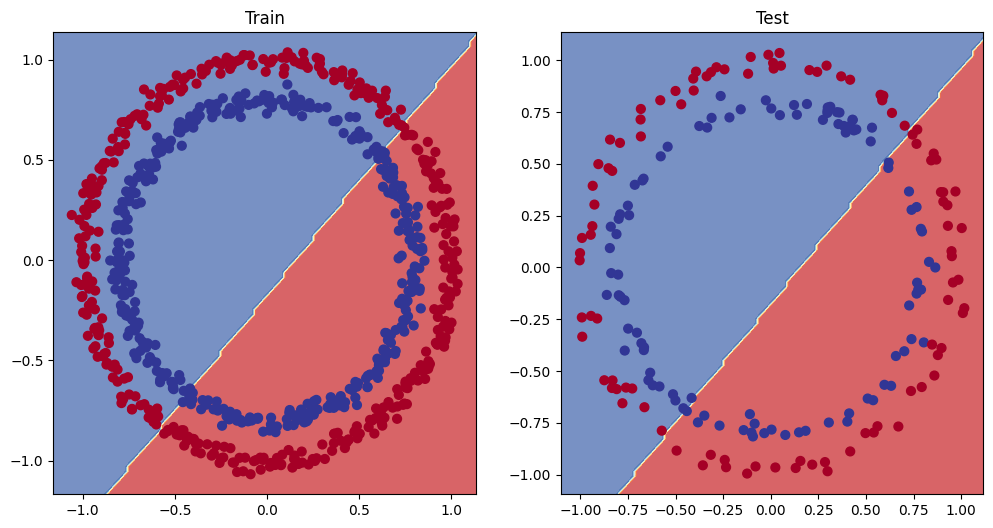

In [24]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

哇，似乎我们找到了模型性能问题的原因。

它目前试图用一条直线来分割红色和蓝色的点...

这就解释了 50% 的准确率。由于我们的数据是圆形的，画一条直线最多只能把它分成两半。

用机器学习的术语来说，我们的模型是 **欠拟合**，这意味着它没有从数据中学习到有效的预测模式。

那么，我们该如何改进呢？


## 5. 改进模型（从模型的角度）

让我们来尝试解决模型的欠拟合问题。

专注于模型（而不是数据），我们有几个方法可以做到这一点。

| 模型改进技巧\*               | 作用                                                                                                                      |
| ---------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **添加更多层**              | 每一层 *潜在* 提高模型的学习能力，每一层都能学习数据中的某种新模式。更多层通常被称为使神经网络变得 *更深*。                                                               |
| **增加更多隐藏单元**           | 与上面类似，更多的隐藏单元意味着模型的 *潜在* 学习能力的提高。更多隐藏单元通常被称为使神经网络变得 *更宽*。                                                               |
| **训练更长时间（更多的 epochs）** | 如果模型有更多的机会查看数据，它可能会学得更多。                                                                                                |
| **更改激活函数**             | 有些数据无法仅用直线来拟合（就像我们看到的那样），使用非线性激活函数可以帮助解决这个问题（提示，提示）。                                                                    |
| **更改学习率**              | 虽然不完全与模型相关，但仍然有关，优化器的学习率决定了模型在每一步中应该多大程度地改变其参数，学习率太大，模型会过度修正，学习率太小，模型学不到足够的东西。                                          |
| **更改损失函数**             | 同样，虽然不完全与模型相关，但依然重要，不同的问题需要不同的损失函数。例如，二元交叉熵损失函数无法用于多类分类问题。                                                              |
| **使用迁移学习**             | 从与你的问题领域相似的问题中获取一个预训练模型，并将其调整到你自己的问题上。在 [笔记本 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/) 中我们讨论了迁移学习。 |

> **注意：** \*由于你可以手动调整所有这些，这些被称为 **超参数**。
>
> 这也是机器学习中艺术与科学的结合之处，因为没有一种方法可以知道对你的项目来说最佳的超参数组合，最好的做法是遵循数据科学家的座右铭：“实验，实验，再实验”。\*

让我们看看如果我们为模型添加一个额外的层，训练更长时间（`epochs=1000` 而不是 `epochs=100`），并将隐藏单元的数量从 `5` 增加到 `10` 会发生什么。

我们将遵循上面相同的步骤，但会修改一些超参数。


In [25]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

现在我们有了更新的模型，我们将重新创建一个损失函数和优化器实例，使用与之前相同的设置。


In [26]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

太棒了，模型、优化器和损失函数都准备好了，让我们来构建训练循环。

这次我们将训练更长时间（`epochs=1000` 而不是 `epochs=100`），看看它是否能改善我们的模型。


In [27]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


什么？我们的模型训练了更长时间，并且添加了一个额外的层，但它看起来仍然没有比随机猜测学到任何更好的模式。

让我们来可视化一下。


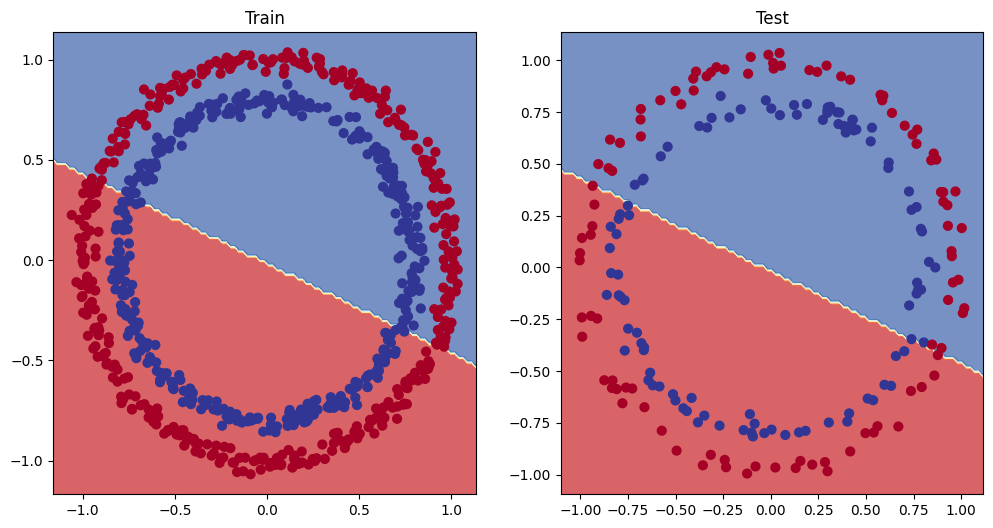

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

嗯。

我们的模型仍然在红色和蓝色的点之间画一条直线。

如果我们的模型在画一条直线，它能否建模线性数据呢？就像我们在 [笔记本 01](https://www.learnpytorch.io/01_pytorch_workflow/) 中做的那样？


### 5.1 准备数据，看看我们的模型是否能够建模直线

让我们创建一些线性数据，看看我们的模型是否能够建模这些数据，而不是仅仅使用一个无法学习任何东西的模型。


In [29]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

太好了，现在让我们将数据拆分为训练集和测试集。


In [30]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


太棒了，让我们看看数据的样子。

为此，我们将使用在笔记本 01 中创建的 `plot_predictions()` 函数。

它包含在我们之前下载的 [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) 中的 [`helper_functions.py` 脚本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)。


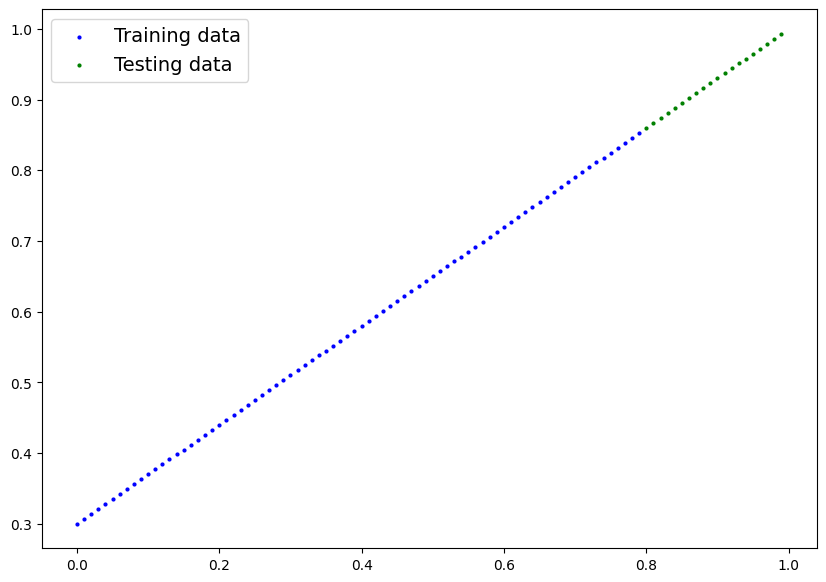

In [31]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 调整 `model_1` 来拟合一条直线

现在我们有了数据，让我们重新创建 `model_1`，但这次使用适合回归数据的损失函数。


In [33]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

我们将设置损失函数为 `nn.L1Loss()`（相当于平均绝对误差），并将优化器设置为 `torch.optim.SGD()`。


In [34]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

现在让我们使用常规的训练循环步骤来训练模型，设置 `epochs=1000`（就像 `model_1` 一样）。

> **注意：** 我们一直在重复编写类似的训练循环代码。我这样做是故意的，为了让大家多加练习。不过，你有没有想过我们可以如何将这部分代码函数化？这样在未来会节省很多编码工作。可能可以为训练和测试各自创建一个函数。


In [35]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.86866, Test loss: 0.49113
Epoch: 100 | Train loss: 0.07695, Test loss: 0.32466
Epoch: 200 | Train loss: 0.04995, Test loss: 0.14866
Epoch: 300 | Train loss: 0.07683, Test loss: 0.17396
Epoch: 400 | Train loss: 0.05364, Test loss: 0.17281
Epoch: 500 | Train loss: 0.05112, Test loss: 0.14090
Epoch: 600 | Train loss: 0.05578, Test loss: 0.14577
Epoch: 700 | Train loss: 0.07648, Test loss: 0.12788
Epoch: 800 | Train loss: 0.07337, Test loss: 0.10672
Epoch: 900 | Train loss: 0.05747, Test loss: 0.13638


好的，与在分类数据上的 `model_1` 不同，看起来 `model_2` 的损失实际上在下降。

让我们绘制它的预测，看看是否真是如此。

并且记住，由于我们的模型和数据使用的是目标 `device`，而该设备可能是 GPU，然而，我们的绘图函数使用的是 matplotlib，而 matplotlib 无法处理 GPU 上的数据。

为了解决这个问题，我们将在将数据传递给 `plot_predictions()` 时，使用 [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) 将所有数据传送到 CPU。


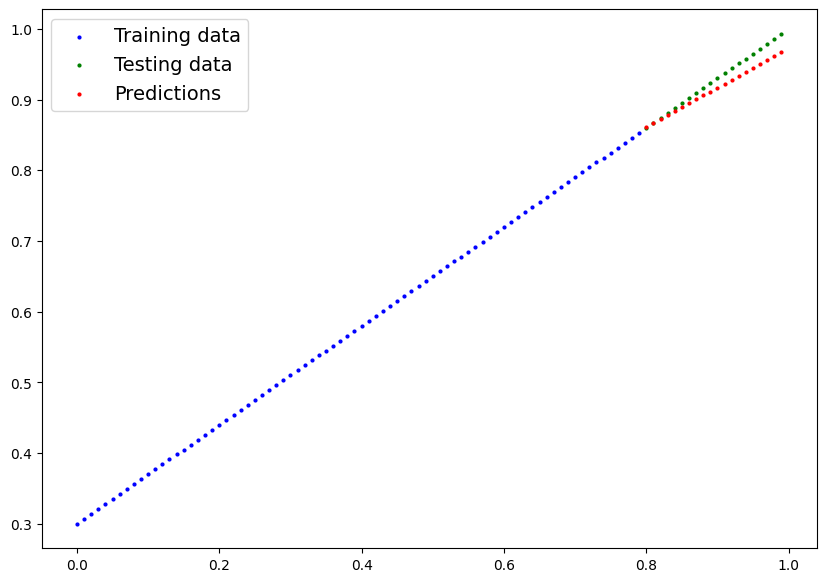

In [36]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

太好了，看起来我们的模型在直线数据上能比随机猜测做得好多了。

这是一个好消息。

这意味着我们的模型至少有 *一些* 学习的能力。

> **注意：** 在构建深度学习模型时，一个有用的故障排除步骤是从尽可能小的模型开始，看看它是否能工作，然后再进行扩展。
>
> 这可能意味着从一个简单的神经网络开始（层数不多，隐藏神经元不多），使用一个小数据集（就像我们创建的那样），然后在这个小示例上 **过拟合**（让模型表现得太好），再逐步增加数据量或模型的规模/设计，以 *减少* 过拟合。

那么，问题可能出在哪里呢？

让我们找找答案。


## 6. 缺失的部分：非线性

我们已经看到，得益于模型的线性层，它能够画出直线（线性）的分割线。

但是，如果我们给它绘制非直线（非线性）分割线的能力呢？

怎么做？

让我们来看看。


### 6.1 重新创建非线性数据（红色和蓝色圆圈）

首先，让我们重新创建数据，从头开始。我们将使用与之前相同的设置。


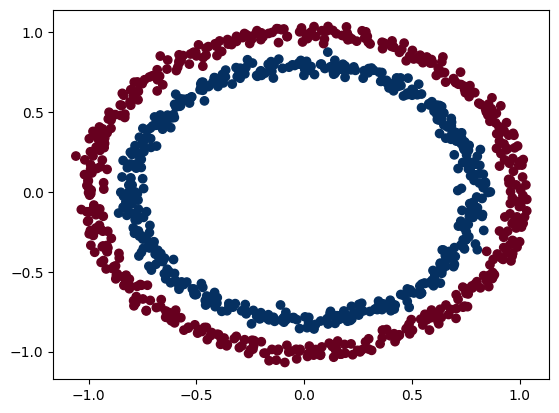

In [37]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

太好了！现在让我们将数据拆分为训练集和测试集，使用 80% 的数据用于训练，20% 的数据用于测试。


In [38]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 构建一个具有非线性的模型

现在进入有趣的部分了。

你认为在无限多的直线（线性）和非直线（非线性）之间，能够画出什么样的模式呢？

我敢打赌，你可以发挥非常有创意。

到目前为止，我们的神经网络只使用了线性（直线）函数。

但我们一直在处理的是非线性数据（圆形）。

你认为当我们给模型引入 **非线性激活函数** 的能力时，会发生什么？

让我们来看看。

PyTorch 有一堆 [现成的非线性激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)，它们做的事相似但又有所不同。

其中最常见且表现最好的一个是 [ReLU](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29)（修正线性单元，[`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)）。

与其说我们讨论它，不如直接将它放在神经网络的隐藏层之间，在前向传播时看看会发生什么。


In [39]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![一个类似于我们刚刚构建的分类神经网络（使用 ReLU 激活函数）的可视化示例](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*这是一个类似于我们刚刚构建的分类神经网络（使用 ReLU 激活函数）的可视化示例。你可以在 [TensorFlow Playground 网站](https://playground.tensorflow.org/) 上创建一个属于你自己的。*

> **问题：** *在构建神经网络时，应该将非线性激活函数放在哪里？*
>
> 一般来说，激活函数应放在隐藏层之间，并且紧跟在输出层之后，但这并不是唯一的选择。随着你对神经网络和深度学习了解的深入，你会发现有很多不同的组合方式。在此期间，最好的方法是进行实验、实验，再实验。

现在我们已经准备好了模型，让我们创建一个二分类的损失函数和优化器。


In [40]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

太棒了!



### 6.3 训练一个具有非线性的模型

你知道该怎么做，模型、损失函数、优化器都准备好后，让我们来创建一个训练和测试循环吧。


In [41]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


哈哈！看起来好多了！


### 6.4 评估一个训练了非线性激活函数的模型

还记得我们的圆形数据是非线性的吗？现在让我们看看，在使用非线性激活函数训练后的模型预测结果如何。


In [42]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

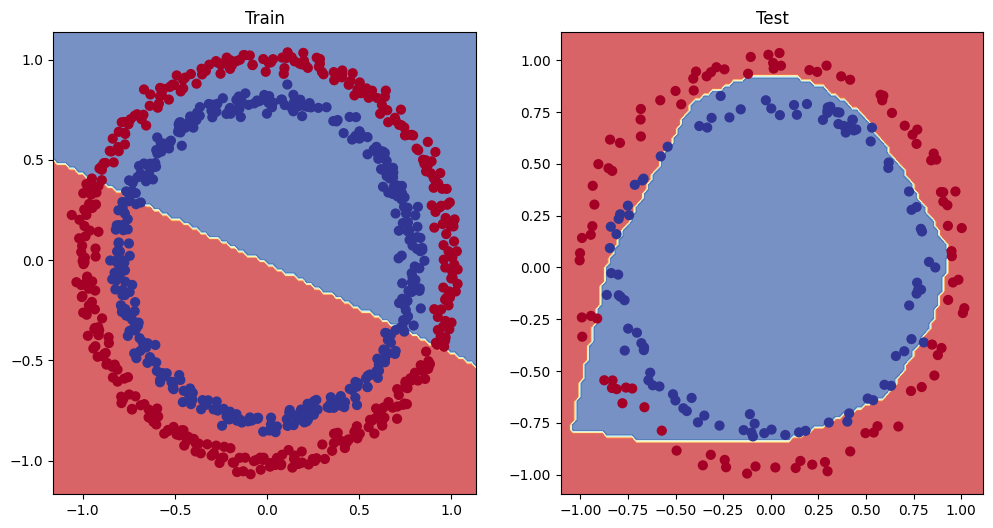

In [43]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

不错！虽然还不是完美，但已经比之前好多了。

你有可能尝试一些方法来提高模型的测试准确率吗？（提示：可以回到第 5 部分，那里有一些改进模型的技巧）


## 7. 复制非线性激活函数

我们之前看到，给模型添加非线性激活函数可以帮助它建模非线性数据。

> **注意：** 在现实中，你会遇到很多非线性数据（或者线性和非线性的组合）。目前我们一直在处理的是二维图上的点。但想象一下，如果你有一些植物的图片想要分类，那有很多不同的植物形状。或者你想总结来自 Wikipedia 的文本，单词组合有很多种方式（线性和非线性模式）。

但非线性激活函数 *看起来* 是什么样的？

我们不妨复制一些并看看它们的作用？

让我们先创建一些数据。


In [44]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

太棒了，现在让我们来绘制它。


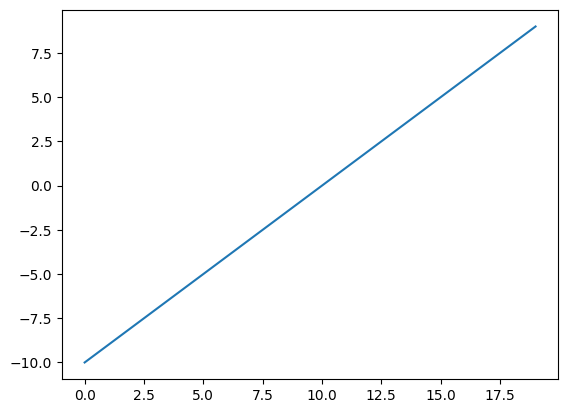

In [45]:
# Visualize the toy tensor
plt.plot(A);

一条直线，漂亮。

现在让我们看看 ReLU 激活函数如何影响它。

这次，我们不使用 PyTorch 的 ReLU (`torch.nn.ReLU`)，而是自己重新实现它。

ReLU 函数将所有负值变为 0，保留正值不变。


In [46]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

看起来我们的 ReLU 函数有效，所有的负值都变成了 0。

现在让我们来绘制它们。


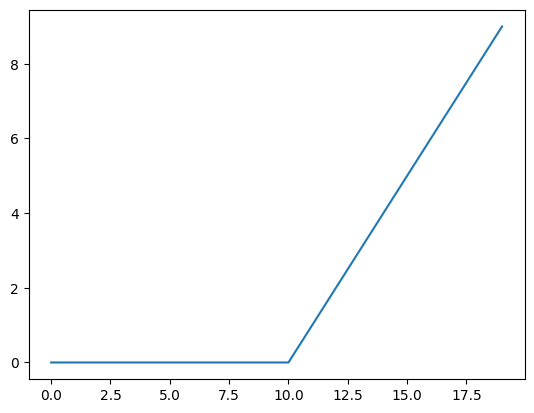

In [47]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

太好了！看起来它和 [Wikipedia 上的 ReLU 函数页面](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) 中的形状完全一样。

现在我们来试试我们一直在使用的 [sigmoid 函数](https://en.wikipedia.org/wiki/Sigmoid_function)。

sigmoid 函数的公式如下：

$out_i = \frac{1}{1+e^{-input_i}}$

或者用 \$x\$ 作为输入：

$S(x) = \frac{1}{1+e^{-x_i}}$

其中 \$S\$ 表示 sigmoid，\$e\$ 表示 [指数](https://en.wikipedia.org/wiki/Exponential_function)（[`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html)），\$i\$ 表示张量中的特定元素。

让我们构建一个函数来用 PyTorch 复制 sigmoid 函数。


In [48]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

哇，这些值看起来和我们之前看到的预测概率很相似，接下来让我们可视化一下它们。


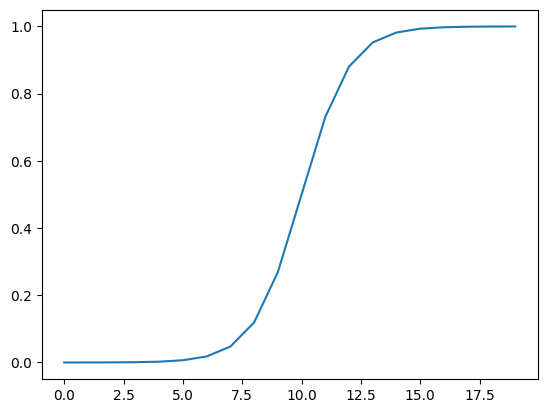

In [49]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

看起来不错！我们已经从一条直线变成了一条曲线。

现在，PyTorch 中还有很多其他的 [非线性激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) 我们还没尝试过。

但这两个是最常见的。

关键是，想象一下，如果你有无限多的线性（直线）和非线性（非直线）函数，你能画出什么样的模式？

几乎什么都能画出来，对吧？

这正是我们的模型在结合线性和非线性函数时所做的。

我们并没有直接告诉模型该怎么做，而是给它提供了工具，让它能找出如何最好地在数据中发现模式。

而这些工具正是线性和非线性函数。


## 8. 将内容整合，构建一个多类 PyTorch 模型

我们已经讨论了很多内容。

但现在让我们将所有内容整合起来，使用一个多类分类问题来应用。

回顾一下，**二分类问题** 处理的是将某物分类为两种选择之一（例如，将一张照片分类为猫或狗），而 **多类分类问题** 则处理从多个选择中分类（例如，将一张照片分类为猫、狗或鸡）。

![二分类与多类分类的对比图，二分类例子为狗 vs 猫，多类分类例子为狗 vs 猫 vs 鸡](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*二分类与多类分类的例子。二分类处理两类（一个是另一种），而多类分类可以处理超过两类的任何数量，例如，流行的 [ImageNet-1k 数据集](https://www.image-net.org/) 作为计算机视觉基准，拥有 1000 个类别。*


### 8.1 创建多类分类数据

要开始多类分类问题，我们首先需要创建一些多类数据。

为此，我们可以利用 Scikit-Learn 的 [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) 方法。

这个方法允许我们创建任意数量的类别（通过 `centers` 参数设置）。

具体来说，我们将执行以下步骤：

1. 使用 `make_blobs()` 创建一些多类数据。
2. 将数据转化为张量（`make_blobs()` 的默认输出是 NumPy 数组）。
3. 使用 `train_test_split()` 将数据拆分为训练集和测试集。
4. 可视化数据。


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


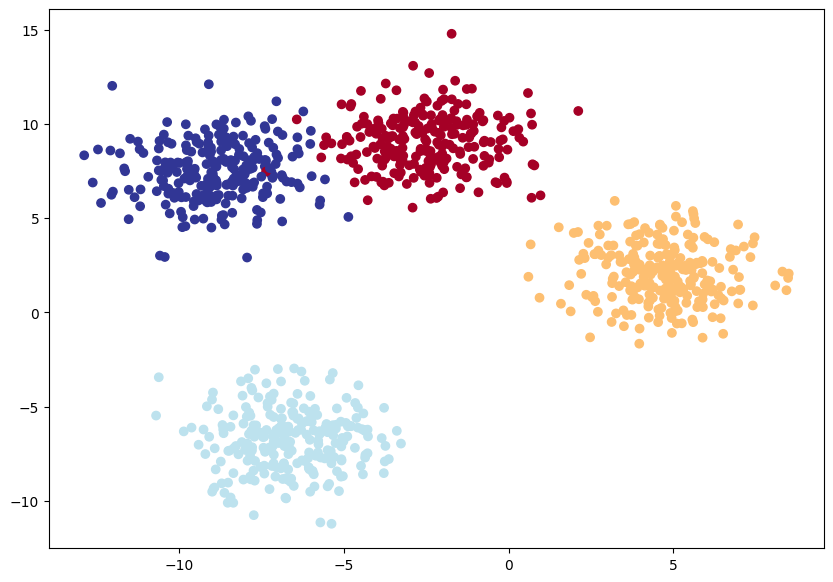

In [50]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

太好了！看起来我们已经准备好了多类数据。

让我们构建一个模型来分隔这些有色的簇。

> **问题：** 这个数据集需要非线性吗？还是说你可以用一系列直线来分隔它？


### 8.2 在 PyTorch 中构建多类分类模型

到目前为止，我们已经在 PyTorch 中创建了几个模型。

你可能已经开始感受到神经网络的灵活性。

那我们来构建一个类似于 `model_3` 的模型，但它仍然能够处理多类数据？

为此，让我们创建一个 `nn.Module` 的子类，它接受三个超参数：

* `input_features` - 输入模型的 `X` 特征的数量。
* `output_features` - 我们希望的理想输出特征数量（这将等同于 `NUM_CLASSES`，即你的多类分类问题中的类的数量）。
* `hidden_units` - 我们希望每个隐藏层使用的隐藏神经元数量。

既然我们在整合这些内容，让我们先设置一些设备无关的代码（我们不必在同一笔记本中重复做这件事，这只是一个提醒）。

然后，我们将使用上面的超参数创建模型类。


In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [52]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

太棒了！我们的多类模型已经准备好了，接下来让我们为它创建一个损失函数和优化器。

### 8.3 为多类 PyTorch 模型创建损失函数和优化器

由于我们正在处理多类分类问题，我们将使用 `nn.CrossEntropyLoss()` 方法作为损失函数。

并且我们将继续使用学习率为 0.1 的 SGD 来优化 `model_4` 的参数。


In [53]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### 8.4 获取多类 PyTorch 模型的预测概率

好的，我们已经准备好了损失函数和优化器，准备好训练模型了，但在开始训练之前，让我们先进行一次前向传播，看看模型是否能正常工作。


In [54]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.8696, -0.7083, -0.3200,  0.5513],
        [-0.1989, -2.0320,  0.4267, -1.2864],
        [-0.9819, -0.0741,  1.0288, -1.7247],
        [-0.6449, -0.4877,  0.7777, -1.4029],
        [-0.2937, -1.7872,  0.4998, -1.3371]], device='cuda:0',
       grad_fn=<SliceBackward0>)

这里输出的是什么呢？

看起来我们每个样本的每个特征都会得到一个值。

让我们检查一下形状来确认一下。


In [55]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

太棒了，我们的模型正在为每个类别输出一个值。

你记得我们模型的原始输出叫什么吗？

提示：它和 "frog splits"（蛙分裂）押韵（在制作这些材料时没有伤害任何动物）。

如果你猜到了 *logits*，那么你猜对了。

所以，现在我们的模型输出的是 logits，但如果我们想要确切知道模型给样本预测的标签是什么呢？

换句话说，我们如何从 `logits -> 预测概率 -> 预测标签`，就像我们在二分类问题中做的一样？

这就是 [softmax 激活函数](https://en.wikipedia.org/wiki/Softmax_function) 发挥作用的地方。

softmax 函数计算每个预测类别是实际预测类别的概率，与所有其他可能的类别进行比较。

如果这还不清楚，让我们看看代码。


In [56]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.8161, -0.8846, -0.2847,  0.4252],
        [-0.9359, -2.0669,  0.9583, -2.2816],
        [-0.6742, -0.0694,  0.8067, -1.3123],
        [ 0.6858, -0.5307, -0.1840,  0.3610],
        [ 0.1430, -1.9414,  0.1816, -0.8017]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.4563, 0.0833, 0.1518, 0.3087],
        [0.1215, 0.0392, 0.8077, 0.0316],
        [0.1289, 0.2361, 0.5669, 0.0681],
        [0.4102, 0.1215, 0.1719, 0.2964],
        [0.3918, 0.0487, 0.4072, 0.1523]], device='cuda:0',
       grad_fn=<SliceBackward0>)


嗯，这里发生了什么？

虽然 softmax 函数的输出看起来仍然像一堆杂乱的数字（而且确实如此，因为我们的模型还没有训练好，预测是基于随机模式的），但是每个样本有一个非常特定的不同之处。

将 logits 通过 softmax 函数之后，每个样本的所有输出值之和现在应该等于 1（或者非常接近 1）。

让我们来检查一下。


In [57]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

这些预测概率本质上是在说模型 *认为* 目标 `X` 样本（输入）最可能映射到每个类别的程度。

由于 `y_pred_probs` 中每个类别都有一个值，因此值最大的索引就是模型认为该特定数据样本 *最* 可能属于的类别。

我们可以使用 `torch.argmax()` 来检查哪个索引具有最高的值。


In [58]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.4563, 0.0833, 0.1518, 0.3087], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')


你可以看到 `torch.argmax()` 的输出是 3，因此对于索引为 0 的样本的特征（`X`），模型预测最有可能的类别值（`y`）是 3。

当然，目前这只是随机猜测，所以它有 25% 的几率是正确的（因为有四个类别）。但我们可以通过训练模型来提高这个几率。

> **注意：** 总结一下上面的内容，模型的原始输出被称为 **logits**。
>
> 对于多类分类问题，将 logits 转换为 **预测概率**，你需要使用 softmax 激活函数（`torch.softmax`）。
>
> 具有最高 **预测概率** 的值的索引就是模型认为给定该样本输入特征后，*最* 可能的类别编号（虽然这是预测，但并不意味着它一定是正确的）。


### 8.5 为多类 PyTorch 模型创建训练和测试循环

好了，现在我们已经完成了所有的准备工作，让我们编写一个训练和测试循环来改进和评估我们的模型。

我们之前做过很多类似的步骤，因此大部分步骤都可以视为练习。

唯一的区别是，我们将调整这些步骤，首先将模型输出（logits）转换为预测概率（使用 softmax 激活函数），然后通过取 softmax 激活函数输出的最大值来得到预测标签。

让我们训练模型 `epochs=100`，并每 10 个 epoch 评估一次模型。


In [60]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.03655, Acc: 99.00% | Test Loss: 0.02813, Test Acc: 99.50%
Epoch: 10 | Loss: 0.03541, Acc: 99.00% | Test Loss: 0.02686, Test Acc: 99.50%
Epoch: 20 | Loss: 0.03449, Acc: 99.00% | Test Loss: 0.02580, Test Acc: 99.50%
Epoch: 30 | Loss: 0.03373, Acc: 99.00% | Test Loss: 0.02491, Test Acc: 99.50%
Epoch: 40 | Loss: 0.03309, Acc: 99.00% | Test Loss: 0.02416, Test Acc: 99.50%
Epoch: 50 | Loss: 0.03255, Acc: 99.00% | Test Loss: 0.02350, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03209, Acc: 99.00% | Test Loss: 0.02293, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03169, Acc: 99.00% | Test Loss: 0.02242, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03134, Acc: 99.00% | Test Loss: 0.02197, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03104, Acc: 99.00% | Test Loss: 0.02157, Test Acc: 99.50%


### 8.6 使用 PyTorch 多类模型进行预测和评估

看起来我们的训练模型表现得相当不错。

但为了确认这一点，让我们做一些预测并将其可视化。


In [61]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 10.8160,  18.4741, -11.1837,  -5.3175],
        [ -0.5159, -22.6841,  -2.0014,   6.4095],
        [-16.3362, -28.9563,  17.3191,   7.5383],
        [  5.7240,  12.3998,  -5.4803,  -3.7465],
        [ 12.2573,   6.7708, -14.5029,  -1.7651],
        [ -1.3044, -27.8671,  -1.6570,   7.9161],
        [-15.1535, -23.2651,  16.5379,   5.8987],
        [  8.6126,  -1.0820, -10.8656,   0.4031],
        [-19.2262, -38.6733,  19.7598,  10.2968],
        [  9.7653,   1.7412, -11.9728,  -0.3837]], device='cuda:0')

好的，看起来我们模型的预测结果仍然是 logit 形式。

不过，为了评估它们，我们需要将其转换为与标签 (`y_blob_test`) 相同的形式，而标签是整数形式的。

让我们将模型的预测 logits 转换为预测概率（使用 `torch.softmax()`），然后通过取每个样本的 `argmax()` 转换为预测标签。

> **注意：** 你可以跳过 `torch.softmax()` 函数，直接从 `predicted logits -> predicted labels`，通过直接对 logits 调用 `torch.argmax()`。
>
> 例如，`y_preds = torch.argmax(y_logits, dim=1)`，这样可以节省一个计算步骤（没有 `torch.softmax()`），但结果是无法获取预测概率。


In [63]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


太棒了！我们的模型预测现在与测试标签的形式一致了。

让我们使用 `plot_decision_boundary()` 来可视化它们。记住，由于我们的数据在 GPU 上，我们需要将其移动到 CPU 上才能与 matplotlib 一起使用（`plot_decision_boundary()` 会自动为我们处理这一步）。


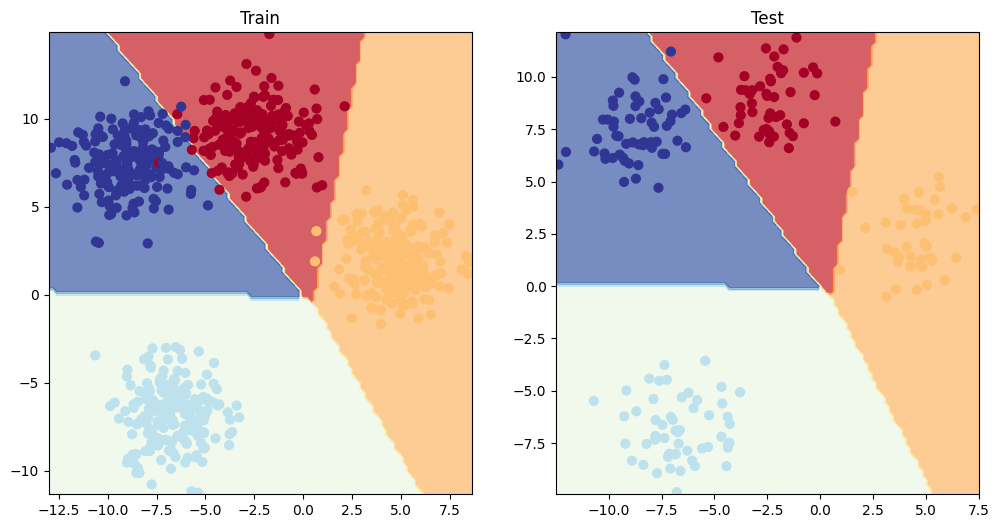

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. 更多分类评估指标

到目前为止，我们只涵盖了几种评估分类模型的方法（准确率、损失和可视化预测）。

这些是你会遇到的最常见的方法，并且是一个不错的起点。

然而，你可能希望使用更多的评估指标来评估你的分类模型，例如以下这些：

| **指标名称/评估方法**                                                                   | **定义**                                              | **代码**                                                                                                                                                                                                                                                                                                                                    |
| ------------------------------------------------------------------------------- | --------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 准确率 (Accuracy)                                                                  | 在 100 次预测中，模型预测正确的次数。比如，95% 准确率意味着模型预测正确了 95/100 次。 | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) 或 [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)                                                                                                 |
| 精确率 (Precision)                                                                 | 真阳性占总样本数的比例。较高的精确率意味着较少的假阳性（模型预测为 1，但实际应该是 0）。      | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) 或 [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)                                                                                             |
| 召回率 (Recall)                                                                    | 真阳性占真阳性和假阴性的总比例（模型预测为 0，但实际应该是 1）。较高的召回率意味着较少的假阴性。  | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) 或 [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)                                                                                                         |
| F1 分数 (F1-score)                                                                | 将精确率和召回率结合成一个指标，1 是最好，0 是最差。                        | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) 或 [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)                                                                                                          |
| [混淆矩阵](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | 以表格形式比较预测值和真实值，如果完全正确，矩阵中的所有值将从左上到右下呈对角线排列。         | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) 或 [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| 分类报告 (Classification report)                                                    | 汇集了主要的分类指标，如精确率、召回率和 F1 分数。                         | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)                                                                                                                                                                                                 |

Scikit-Learn（一个流行的世界级机器学习库）提供了上述指标的许多实现。如果你想要一个类似 PyTorch 的版本，可以查看 [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/)，特别是 [TorchMetrics 分类部分](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html)。

让我们试试 `torchmetrics.Accuracy` 指标。


In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises

所有练习都集中在练习上面各个部分的代码。

你应该能够通过参考每个部分或跟随链接的资源来完成它们。

所有练习都应该使用 [设备无关的代码](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code)。

### 资源:

* [第 02 部分的练习模板笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb)
* [第 02 部分的示例解决方案笔记本](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/02_pytorch_classification_exercise_solutions.ipynb)（在查看这个之前先做练习）

### 练习：

1. 使用 Scikit-Learn 的 [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 函数创建一个二分类数据集。

   * 为了保持一致，数据集应包含 1000 个样本，并且设置 `random_state=42`。
   * 将数据转换为 PyTorch 张量。使用 `train_test_split` 将数据拆分为训练集（80%）和测试集（20%）。
2. 构建一个通过子类化 `nn.Module` 的模型，模型应该能使用非线性激活函数并拟合你在第 1 步创建的数据。

   * 可以使用任何你想要的 PyTorch 层（线性层和非线性层）组合。
3. 设置一个适合二分类的损失函数和优化器，用于训练模型。
4. 创建一个训练和测试循环，训练你在第 2 步中创建的模型，拟合第 1 步中创建的数据。

   * 为了衡量模型的准确性，你可以创建自己的准确率函数，或者使用 [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/) 中的准确率函数。
   * 训练模型，直到它达到超过 96% 的准确率。
   * 训练循环应该每训练 10 个 epoch 输出一次模型的训练集和测试集损失及准确率。
5. 使用训练好的模型进行预测，并使用 `plot_decision_boundary()` 函数将其可视化。
6. 在 PyTorch 中复制 Tanh（双曲正切）激活函数。

   * 可以参考 [ML cheatsheet 网站](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) 获取公式。
7. 使用 [CS231n 的螺旋数据创建函数](https://cs231n.github.io/neural-networks-case-study/)（见下方代码）创建一个多类数据集。

   * 构建一个能够拟合数据的模型（你可能需要线性和非线性层的组合）。
   * 构建一个适合处理多类数据的损失函数和优化器（可选扩展：使用 Adam 优化器而不是 SGD，可能需要尝试不同的学习率值来让它正常工作）。
   * 为多类数据创建一个训练和测试循环，并训练模型，使其在测试集上达到超过 95% 的准确率（你可以使用任何准确率衡量函数）。
   * 在螺旋数据集上绘制决策边界，使用模型预测结果，`plot_decision_boundary()` 函数也适用于此数据集。

```python
# 创建螺旋数据集的代码（来自 CS231n）
import numpy as np
N = 100 # 每类的点数
D = 2 # 特征维度
K = 3 # 类别数
X = np.zeros((N*K,D)) # 数据矩阵（每行是一个样本）
y = np.zeros(N*K, dtype='uint8') # 类别标签
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # 半径
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # 角度
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# 可视化数据
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## 额外课外活动

* 写下 3 个你认为机器学习分类可以有用的场景（这些可以是任何问题，尽可能发挥创意。例如，根据购买金额和购买地点特征将信用卡交易分类为欺诈或非欺诈）。
* 研究一下基于梯度的优化器（如 SGD 或 Adam）中的 "momentum" 概念，它是什么意思？
* 花 10 分钟阅读 [不同激活函数的 Wikipedia 页面](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions)，你能将这些与 [PyTorch 的激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) 对应起来多少个？
* 研究一下什么情况下准确率可能不是一个好的评估指标（提示：阅读 [Will Koehrsen 的“超越准确率”](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) 获取一些想法）。
* **观看：** 为了理解我们神经网络中的工作原理以及它们如何学习，观看 [MIT 的深度学习入门视频](https://youtu.be/7sB052Pz0sQ)。
